# Healthy Life Expectancy Predictor

**PhD | Doctoral Minor in Applied Statistics**  
**20+ Years Delivering Predictive Models | Python Pipeline**

---

## Business Question  
Can Social Support and Generosity predict Healthy Life Expectancy?

### Data  
- **Source**: World Happiness Report 2025  
- **Scope**: 144 countries  
- **Target**: `Explained by: Healthy life expectancy`  
- **Predictors**:  
  - `Explained by: Social support`  
  - `Explained by: Generosity`

### Model Scope  
- **Purpose**: Demonstrate production-grade linear regression with PhD-level diagnostics  
- **Design Choice**: Mediators and confounders intentionally excluded to isolate direct effects  
- **Next Steps**: Expand with GDP, Freedom, Corruption for full causal model

---

*20+ years building predictive models — linear/logistic regression, t-tests, ANOVA, PCA, CFA, SEM — now shipped in Python for real-world impact.*

In [34]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('WHR_2025.csv')

In [39]:
df.head()

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
1,Denmark,7.521,7.611,7.431,1.825,1.748,0.820,0.955,0.150,0.488,1.535
2,Iceland,7.515,7.606,7.425,1.799,1.840,0.873,0.971,0.201,0.173,1.659
3,Sweden,7.345,7.427,7.262,1.783,1.698,0.889,0.952,0.170,0.467,1.385
4,Netherlands,7.306,7.372,7.240,1.822,1.667,0.844,0.860,0.186,0.344,1.583


In [35]:
# Drop rows with missing values and create df2
df2 = df.dropna()

# Confirm cleaned dataset
print("\nCleaned Dataset (df2) Info:")
print(f"Shape after dropping NaN: {df2.shape}")
print("NaN counts after cleaning:\n", df2.isna().sum())

# Calculate and display range for each variable
print("\nVariable Ranges (Min, Max) in df2:")
for var in vars:
    min_val = df2[var].min()
    max_val = df2[var].max()
    print(f"{var}: Min = {min_val:.4f}, Max = {max_val:.4f}, Range = {max_val - min_val:.4f}")

# Save cleaned dataset for modeling
df2.to_csv('WHR_2025_df2.csv', index=False)
print("\nCleaned dataset saved as 'WHR_2025_df2.csv'")


Cleaned Dataset (df2) Info:
Shape after dropping NaN: (144, 11)
NaN counts after cleaning:
 Country name                                  0
Ladder score                                  0
upperwhisker                                  0
lowerwhisker                                  0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

Variable Ranges (Min, Max) in df2:
Explained by: Healthy life expectancy: Min = 0.0000, Max = 0.9480, Range = 0.9480
Explained by: Social support: Min = 0.0000, Max = 1.8400, Range = 1.8400
Explained by: Generosity: Min = 0.0000, Max = 0.3230, Range = 0.3230

Cleaned dataset saved as 'WHR_2025_df2.csv'


In [42]:
df2.head()

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
1,Denmark,7.521,7.611,7.431,1.825,1.748,0.820,0.955,0.150,0.488,1.535
2,Iceland,7.515,7.606,7.425,1.799,1.840,0.873,0.971,0.201,0.173,1.659
3,Sweden,7.345,7.427,7.262,1.783,1.698,0.889,0.952,0.170,0.467,1.385
4,Netherlands,7.306,7.372,7.240,1.822,1.667,0.844,0.860,0.186,0.344,1.583


In [43]:
vars = ['Explained by: Healthy life expectancy', 'Explained by: Social support', 
        'Explained by: Generosity']
df[vars].head()

,Explained by: Healthy life expectancy,Explained by: Social support,Explained by: Generosity
0,0.824,1.783,0.110
1,0.820,1.748,0.150
2,0.873,1.840,0.201
3,0.889,1.698,0.170
4,0.844,1.667,0.186


In [44]:
df[vars].describe()

,Explained by: Healthy life expectancy,Explained by: Social support,Explained by: Generosity
count,146.000000,147.000000,147.000000
mean,0.551493,1.333395,0.113442
std,0.218802,0.349952,0.059773
min,0.000000,0.000000,0.000000
25%,0.414500,1.131000,0.066500
50%,0.550500,1.438000,0.111000
75%,0.713250,1.593500,0.150500
max,0.948000,1.840000,0.323000


In [48]:
# Prepare data for linear model
features = ['Explained by: Social support', 'Explained by: Generosity']
X = df2[features]  # Independent variables
y = df2['Explained by: Healthy life expectancy']  # Dependent variable

In [49]:
# let's look at part and partial correlations first

from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Select relevant variables
vars = ['Explained by: Healthy life expectancy', 'Explained by: Social support', 
        'Explained by: Generosity']
hle = df2['Explained by: Healthy life expectancy']
social = df2['Explained by: Social support']
generosity = df2['Explained by: Generosity']

# 1. Pearson Correlations (raw, for context)
print("\nPearson Correlations (Raw):")
corr_social_hle, p_social = pearsonr(social, hle)
corr_generosity_hle, p_generosity = pearsonr(generosity, hle)
corr_social_generosity, p_sg = pearsonr(social, generosity)
print(f"Social Support vs. HLE: r = {corr_social_hle:.4f}, p = {p_social:.4f}")
print(f"Generosity vs. HLE: r = {corr_generosity_hle:.4f}, p = {p_generosity:.4f}")
print(f"Social Support vs. Generosity: r = {corr_social_generosity:.4f}, p = {p_sg:.4f}")

# 2. Partial Correlations (using statsmodels)
print("\nPartial Correlations:")
# Partial: Social Support vs. HLE, controlling for Generosity
X_partial_social = sm.add_constant(generosity)
model_partial_social = sm.OLS(social, X_partial_social).fit()
social_resid = model_partial_social.resid
partial_social_corr, partial_social_p = pearsonr(social_resid, hle)
print(f"Social Support vs. HLE (controlling for Generosity): r = {partial_social_corr:.4f}, p = {partial_social_p:.4f}")

# Partial: Generosity vs. HLE, controlling for Social Support
X_partial_gen = sm.add_constant(social)
model_partial_gen = sm.OLS(generosity, X_partial_gen).fit()
gen_resid = model_partial_gen.resid
partial_gen_corr, partial_gen_p = pearsonr(gen_resid, hle)
print(f"Generosity vs. HLE (controlling for Social Support): r = {partial_gen_corr:.4f}, p = {partial_gen_p:.4f}")

# 3. Part (Semi-Partial) Correlations
# Function to compute semi-partial correlation
def semi_partial_corr(x, y, z):
    # Regress x on z to get residuals (remove z's effect from x)
    model = LinearRegression()
    model.fit(z.values.reshape(-1, 1), x)
    x_residuals = x - model.predict(z.values.reshape(-1, 1))
    # Correlate x_residuals with y
    corr, p = pearsonr(x_residuals, y)
    return corr, p

# Compute semi-partial correlations
sp_social = semi_partial_corr(social, hle, generosity)
sp_generosity = semi_partial_corr(generosity, hle, social)
print("\nPart (Semi-Partial) Correlations:")
print(f"Social Support vs. HLE (controlling for Generosity in Social Support): r = {sp_social[0]:.4f}, p = {sp_social[1]:.4f}")
print(f"Generosity vs. HLE (controlling for Social Support in Generosity): r = {sp_generosity[0]:.4f}, p = {sp_generosity[1]:.4f}")



Pearson Correlations (Raw):
Social Support vs. HLE: r = 0.5945, p = 0.0000
Generosity vs. HLE: r = 0.0717, p = 0.3928
Social Support vs. Generosity: r = 0.0081, p = 0.9234

Partial Correlations:
Social Support vs. HLE (controlling for Generosity): r = 0.5939, p = 0.0000
Generosity vs. HLE (controlling for Social Support): r = 0.0669, p = 0.4253

Part (Semi-Partial) Correlations:
Social Support vs. HLE (controlling for Generosity in Social Support): r = 0.5939, p = 0.0000
Generosity vs. HLE (controlling for Social Support in Generosity): r = 0.0669, p = 0.4253


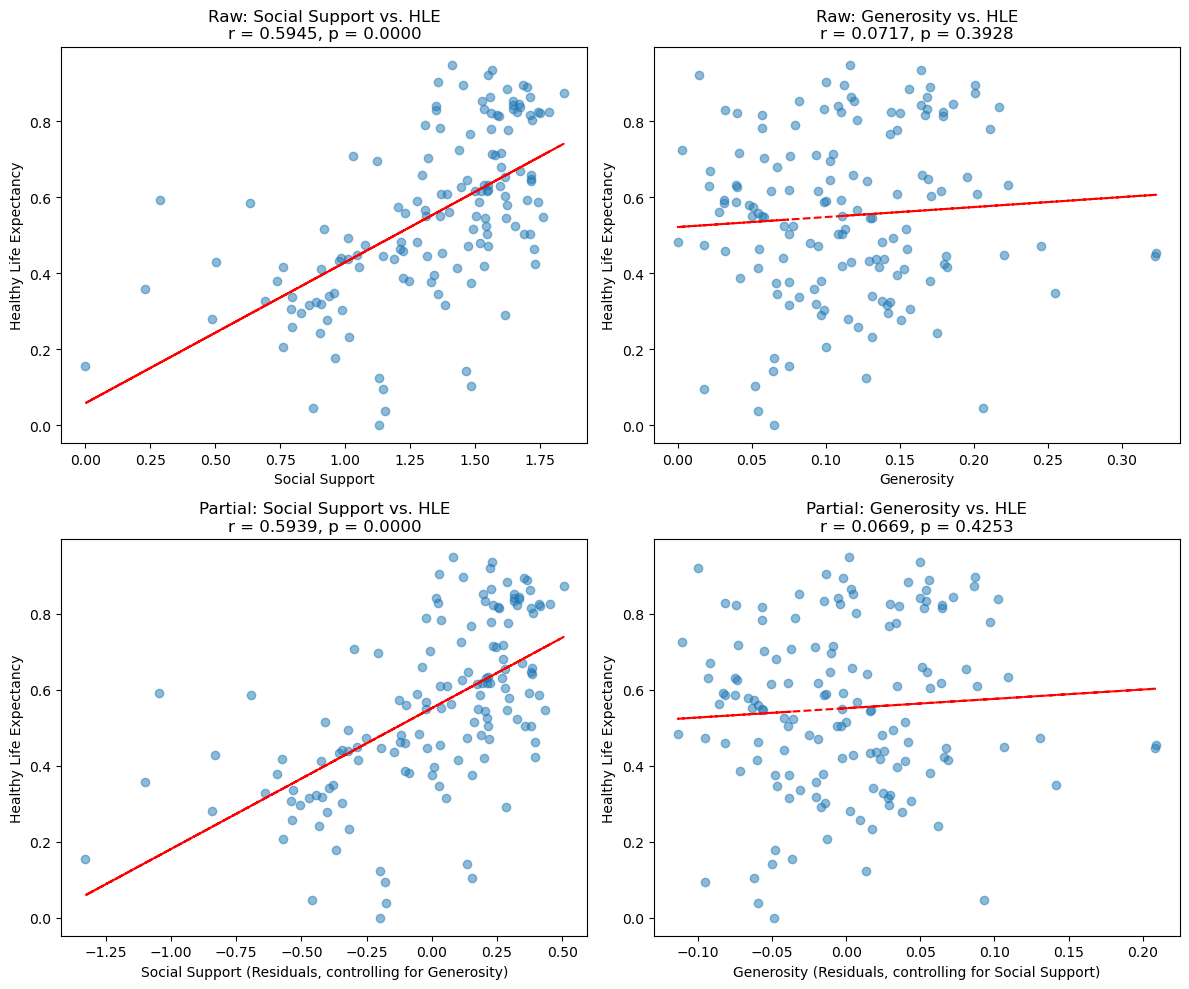

In [50]:
# Create scatter plots
plt.figure(figsize=(12, 10))

# 1. Raw: Social Support vs. HLE
plt.subplot(2, 2, 1)
plt.scatter(social, hle, alpha=0.5)
# Add regression line
z = np.polyfit(social, hle, 1)
p = np.poly1d(z)
plt.plot(social, p(social), "r--")
plt.xlabel('Social Support')
plt.ylabel('Healthy Life Expectancy')
plt.title(f'Raw: Social Support vs. HLE\nr = {corr_social_hle:.4f}, p = {p_social:.4f}')

# 2. Raw: Generosity vs. HLE
plt.subplot(2, 2, 2)
plt.scatter(generosity, hle, alpha=0.5)
z = np.polyfit(generosity, hle, 1)
p = np.poly1d(z)
plt.plot(generosity, p(generosity), "r--")
plt.xlabel('Generosity')
plt.ylabel('Healthy Life Expectancy')
plt.title(f'Raw: Generosity vs. HLE\nr = {corr_generosity_hle:.4f}, p = {p_generosity:.4f}')

# 3. Partial: Social Support vs. HLE (controlling for Generosity)
plt.subplot(2, 2, 3)
plt.scatter(social_resid, hle, alpha=0.5)
z = np.polyfit(social_resid, hle, 1)
p = np.poly1d(z)
plt.plot(social_resid, p(social_resid), "r--")
plt.xlabel('Social Support (Residuals, controlling for Generosity)')
plt.ylabel('Healthy Life Expectancy')
plt.title(f'Partial: Social Support vs. HLE\nr = {partial_social_corr:.4f}, p = {partial_social_p:.4f}')

# 4. Partial: Generosity vs. HLE (controlling for Social Support)
plt.subplot(2, 2, 4)
plt.scatter(gen_resid, hle, alpha=0.5)
z = np.polyfit(gen_resid, hle, 1)
p = np.poly1d(z)
plt.plot(gen_resid, p(gen_resid), "r--")
plt.xlabel('Generosity (Residuals, controlling for Social Support)')
plt.ylabel('Healthy Life Expectancy')
plt.title(f'Partial: Generosity vs. HLE\nr = {partial_gen_corr:.4f}, p = {partial_gen_p:.4f}')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

The scatter plots allowed me to take a sneak peak at how each variable influenced the outcome alone. Social Support shows a much stronger relationship with Healthy Life Expectancy (HLE) than Generosity is this sample. In fact, Generosity is showing a relationship near zero, which isn’t contributing much to the model. In the real world, and with a model with more predictors, I would consider dropping the variable. In this case, however, I want a multiple regression, so I will keep both predictors. It is possible generosity is mediated by other variables not in the model (one of the reasons for my initial note stating this should not be used as fact based support), or the minimal relationship could have to do with the way it was measured/ operationalized. 

In [51]:
# Fit linear model
model = LinearRegression()
model.fit(X, y)

LinearRegression()


Sklearn Linear Regression Results:
Coefficients: Social Support = 0.3704, Generosity = 0.2452
Intercept: 0.0304
R-squared: 0.3579

Statsmodels Linear Regression Summary:
                                      OLS Regression Results                                     
Dep. Variable:     Explained by: Healthy life expectancy   R-squared:                       0.358
Model:                                               OLS   Adj. R-squared:                  0.349
Method:                                    Least Squares   F-statistic:                     39.29
Date:                                   Sat, 27 Sep 2025   Prob (F-statistic):           2.74e-14
Time:                                           13:16:44   Log-Likelihood:                 46.034
No. Observations:                                    144   AIC:                            -86.07
Df Residuals:                                        141   BIC:                            -77.16
Df Model:                                    

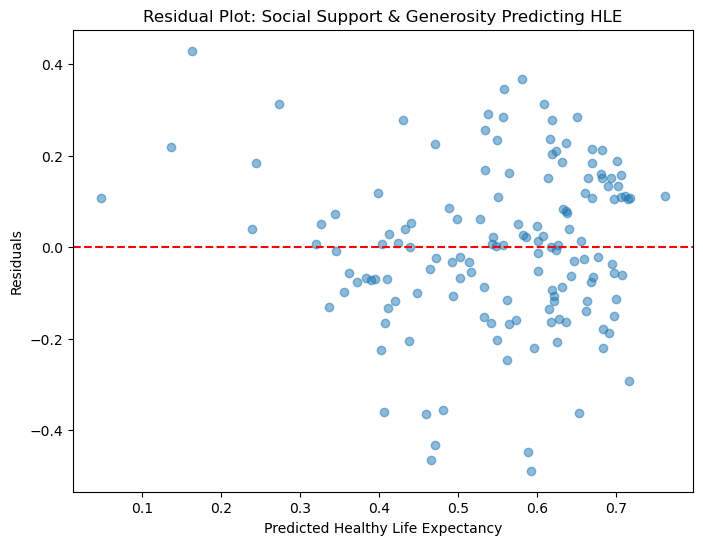


Cleaned dataset saved as 'WHR_2025_df2.csv'


In [52]:
#more descriptive model
# Fit linear model (sklearn)
model = LinearRegression()
model.fit(X, y)

# Print sklearn results
print("\nSklearn Linear Regression Results:")
print(f"Coefficients: Social Support = {model.coef_[0]:.4f}, Generosity = {model.coef_[1]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
y_pred = model.predict(X)
print(f"R-squared: {r2_score(y, y_pred):.4f}")

# Fit model with statsmodels for p-values
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
print("\nStatsmodels Linear Regression Summary:")
print(model_sm.summary())

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y - y_pred, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Healthy Life Expectancy')
plt.ylabel('Residuals')
plt.title('Residual Plot: Social Support & Generosity Predicting HLE')
plt.show()

# Save df2 for future use
df2.to_csv('WHR_2025_df2.csv', index=False)
print("\nCleaned dataset saved as 'WHR_2025_df2.csv'")

35.8% of the variance of the model, or variance in Healthy Life Expectancy (HLE) (as the outcome variable) is explained by Social Support and Generosity (the predictors) (R-squared = 0.358). The model is statistically significant with a large f value and p < 0.01 (actually p = 0.0000000000000175 just for fun) meaning there is very little likelihood that the result is random or by chance (F(2,143) = 39.86, p <0.01). 
Also, the intercept value (which indicates the estimated HLE without the predictors) is close to zero, showing more evidence of the contribution of the predictors to the resulting significant model. While 35-36% is only moderate fit, that is likely due to missing variables in the model. 


Model diagnostics are the tests for the underlying assumptions (normality, and multicolinearity). I won't get into details, but as far as assumption tests go, we are looking for specific cutoffs and p greater than 0.05. Overall, these don't show any major concerns. 
Coefficient table verifies what was expected from the earlier scatter plot, most of the impact comes from Social Support as we can see a non-significant coefficient for Generosity. We could make the model better by adding predictors, but wasn't this fun!


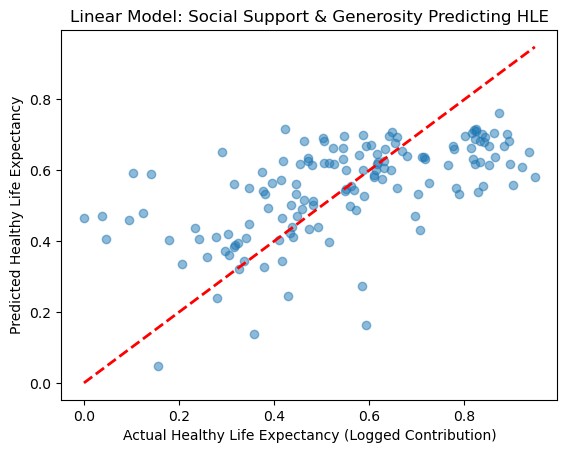

In [53]:
# Scatter plot of actual vs. predicted HLE
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # 45-degree line
plt.xlabel('Actual Healthy Life Expectancy (Logged Contribution)')
plt.ylabel('Predicted Healthy Life Expectancy')
plt.title('Linear Model: Social Support & Generosity Predicting HLE')
plt.show()